Attrition in human resources refers to the gradual loss of employees over time. In general, relatively high attrition is problematic for companies. 

Employee attrition is predictable under stable circumstances, wherein a set pattern can be deduced from certain parameters influencing the employee and the organization at all times. Some of these parameters could be foreseeable such as retirement age or unforeseeable such as company performance, external funding, management shakeup etc.

However, who is going to leave, when and why, can be answered based on analytical models using a combination of three type of analytics:

1. Descriptive Analytics: What are the observations that help us shape our various hypotheses about staff attrition?

2. Predictive Analytics: Which members of staff are about to leave?

3. Prescriptive Analytics: What insights or suggestions can be made concerning those members of staff who are likely to leave?


In this exercise I explore the fictional data set created by IBM Data scientists:
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset. This dataset is about 1470 rows and 35 attributes which consist of 8 categorical variables and 26 numerical variables and the target label for the data set is “Attrition”. 

I attempt to Uncovers the factors that lead to employee attrition and explore important questions such as ‘a breakdown of distance from home by job role and attrition and ‘compare the average monthly income by education and attrition.


In [ ]:
#Standard libraries for data analysis:
import numpy as np
import pandas as pd

#Standard libraries for data visualization:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 8
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.express as px
import plotly.tools as tls

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

**Loading the Data**

---



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition (1).csv


In [ ]:
ibm = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv', encoding='Latin-1')
ibm.head()

,ï»¿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
# checking for missing values

display(ibm.isnull().any())
#ibm.isnull().sum()

ï»¿Age                      False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

Note: The dataset has no missing values.


In [ ]:
#checking for duplicate rows
ibm[ibm.duplicated(keep='first')].shape

(0, 35)

Note: dataset has no duplicate rows

In [ ]:
# checking for unique values in each column
ibm.nunique()

ï»¿Age                        43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [ ]:
# renaming the age column
ibm.rename(columns={'ï»¿Age': 'Age'}, inplace=True)

# Exploratory Data Analysis

Here we take a look at the data and see how features are contributing to the data and to attrition of employees.

In [ ]:
display(ibm.info())
# display(ibm.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

None

Visualizing the distribution of the target Variable

In [ ]:
fig = px.pie(ibm, names = "Attrition", title = "Attrition Values")
fig.show(renderer='colab')

Text(0.5, 1.0, 'Attrition')

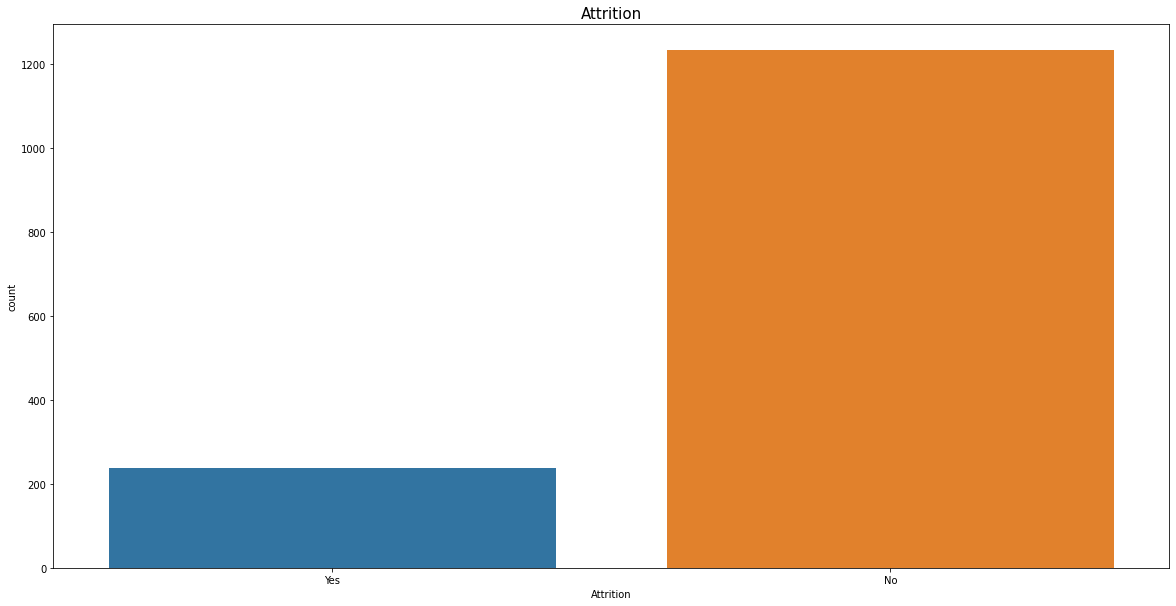

In [ ]:
sns.countplot(ibm.Attrition)
plt.title('Attrition', fontsize=15)

In [ ]:
'''ibm['Attrition'].value_counts().plot(kind='bar', color='red', alpha=.65)
plt.title('Visualizing Attrition Value Counts')'''

- From the charts above we realize that the dataset is imbalanced and therefore it is necessary to apply either undersampling or oversampling to it in later stages when modelling

**Correlation:**

---



We aim to predict the employee attrition and it is important to see which variables contribute the most in attrition hence we need to know if the variables are correlated so we know which to avoid in the model building process.


In [ ]:
# eliminating columns with only one data level

temp = []
for col in ibm.columns:
    if len(ibm[col].unique()) == 1:
        temp.append(col)
        ibm.drop(col, inplace=True, axis=1)

display(temp)

['EmployeeCount', 'Over18', 'StandardHours']

In [ ]:
# dropping other unnecessary columns
ibm.drop(columns='EmployeeNumber', inplace=True)

In [ ]:
map = {'Yes':1, 'No':0}

ibm['Attrition_encoded'] = ibm['Attrition'].apply(lambda x: map[x])
ibm['Overtime_encoded'] = ibm['OverTime'].apply(lambda x: map[x])

In [ ]:
numericals = ibm.select_dtypes(include=np.number).columns.tolist()
numericals

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Attrition_encoded',
 'Overtime_encoded']

In [ ]:
display(ibm[numericals].corr())

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_encoded,Overtime_encoded
Age,1.000000,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205,0.028062
DailyRate,0.010661,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652,0.009135
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924,0.025514
Education,0.208034,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373,-0.020322
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197,-0.010577,-0.024037
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369,0.070132
HourlyRate,0.024287,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846,-0.007782
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016,-0.003507
JobLevel,0.509604,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105,0.000544
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,-0.103481,0.024539


In [ ]:
data = [go.Heatmap( z = ibm[numericals].astype('float64').corr().values,   #generates pearson correlation values
                    x = ibm[numericals].columns.values,
                    y = ibm[numericals].columns.values,
                    colorscale = 'Reds',
                    reversescale = False,
                    opacity = 1.0 ) ]

layout = go.Layout( title = 'Comparing Pearson Correlation Values of the Numerical Columns',
                    xaxis = dict(ticks='', nticks=36),
                    yaxis = dict(ticks='' ),
                    width = 900, height = 700, )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap')
fig.show(renderer='colab')

From the above correlation table and matrix we can conclude that: 
1. Monthly income is highly correlated with job level. However, daily rate, hourly rate and monthly rate are barely correlated with anything. 
2. Job level and total working years are highly correlated.
3. Monthly Income and total working years are highly correlated.
4. Performance rating and percentage salary hike are highly correlated.
5. Years in current role and years at company are highly correlated.
6. Years with current manager and years at company are highly correlated.

In [ ]:
# dropping the daily, montly and hourly rates
ibm.drop(columns=['DailyRate', 'HourlyRate', 'MonthlyRate'], inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1710695510>,
      dtype=object)

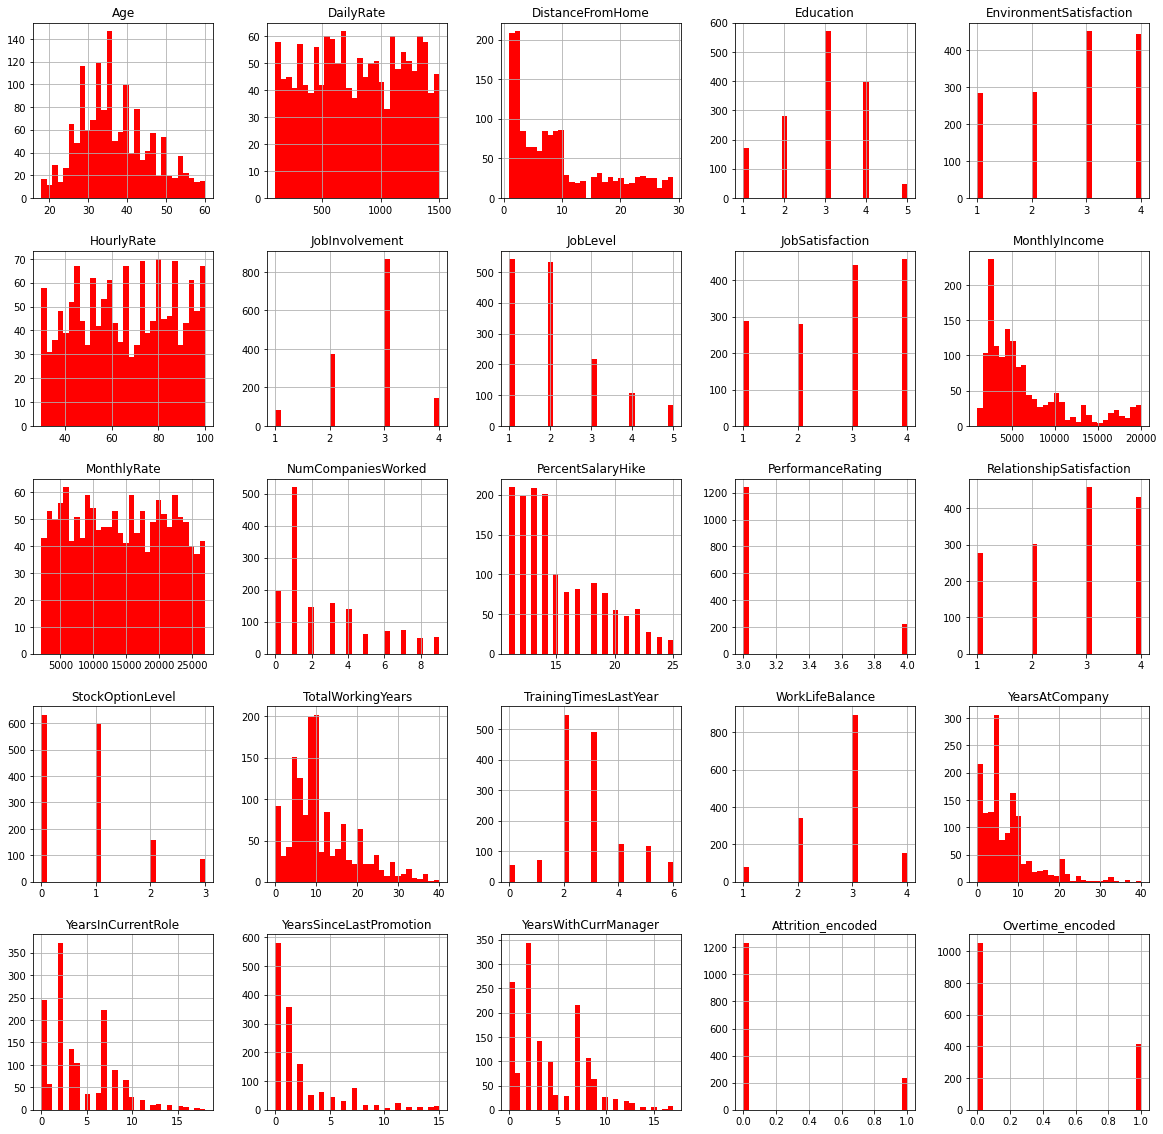

In [ ]:
# plotting frequency distribution of each attribute
ibm.hist(bins = 30, figsize = (20,20), color = 'r')

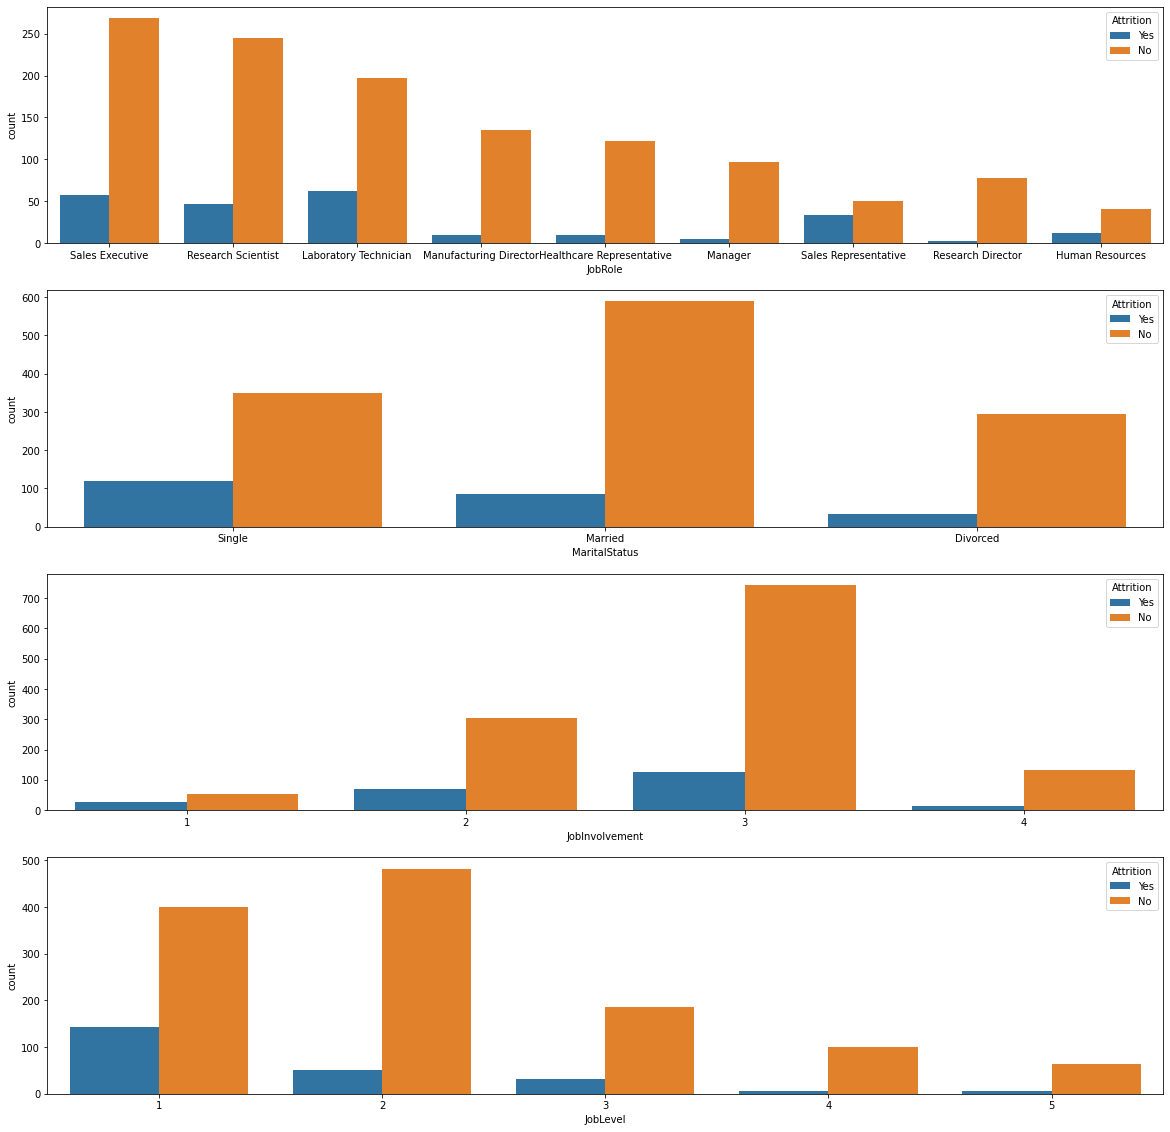

In [115]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = ibm)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = ibm)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = ibm)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = ibm)

In [ ]:
# sns.factorplot(x = 'MaritalStatus', y='Attrition', kind = 'bar', data=df)

Note: We conclude that:
1. Single employees tend to leave compared to married and divorced
2. Sales Representitives tend to leave compared to any other job 
3. Less involved employees tend to leave the company 
4. Less experienced (low job level) tend to leave the company

**Breakdown of Attrition with respect to Gender**

---



Text(0, 0.5, 'Frequency of Attrition')

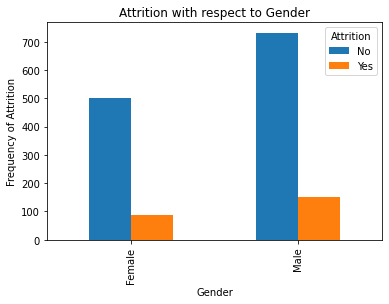

In [ ]:
pd.crosstab(ibm['Gender'], ibm['Attrition']).plot(kind='bar')
plt.title('Attrition with respect to Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of Attrition')

Note: More male employees tend leave on average compared to female employees

**Breakdown of Attrition with respect to Departments**

---



(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

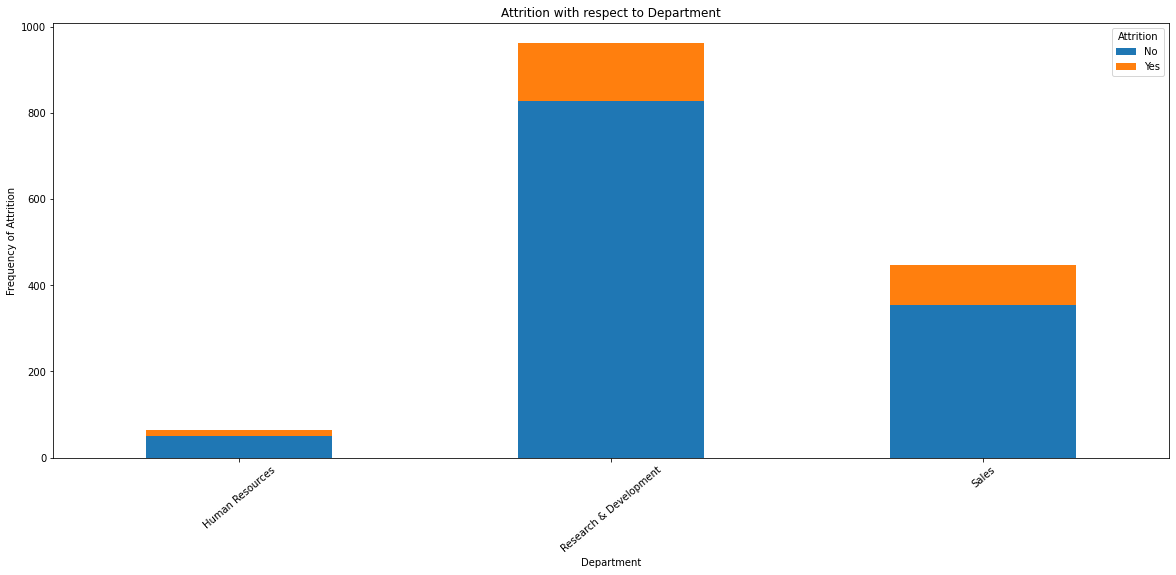

In [118]:
pd.crosstab(ibm['Department'], ibm['Attrition']).plot(kind='bar', stacked=True)
plt.title('Attrition with respect to Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Attrition')
plt.xticks(rotation=40)

Note: Attrition seems to be prominently dependant on the Department attribute and will be useful for modelling and prediction. R&D department has the highest record for attrition, on the other hand it also has the highest number of employees when compared to HR and Sales departments.

Breakdown of Attrition with respect to EducationField

---



Text(0, 0.5, 'Frequency of Attrition')

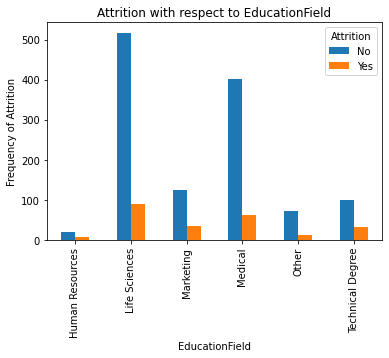

In [ ]:
pd.crosstab(ibm['EducationField'], ibm['Attrition']).plot(kind='bar', stacked=False)
plt.title('Attrition with respect to EducationField')
plt.xlabel('EducationField')
plt.ylabel('Frequency of Attrition')

Note: Life Sciences and Medical fields have the highest number of employees and attrition rate as well. 

**Visualising Distance From Home with respect to Attrition**

---



Text(0.5, 0, 'Distance From Home')

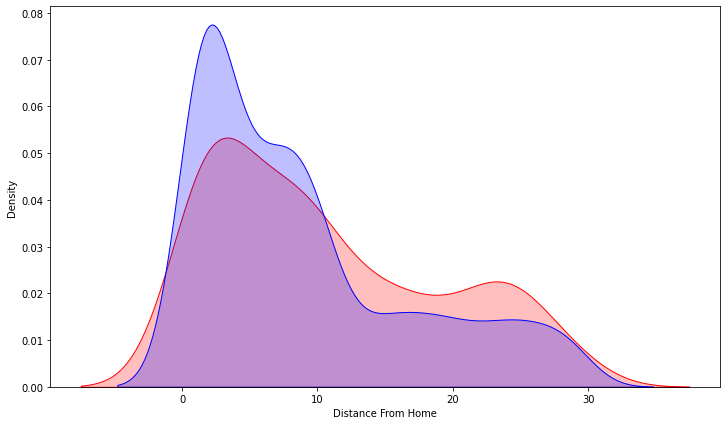

In [117]:
# KDE (Kernel Density Estimate) describes the Probability Density of a continuous variable. 

plt.figure(figsize=(12,7))
sns.kdeplot(ibm['DistanceFromHome'][ibm.Attrition == 'Yes'], label= 'Employees who Left', shade = True, color = 'r')
sns.kdeplot(ibm['DistanceFromHome'][ibm.Attrition == 'No'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('Distance From Home')

**Visualising Years with Current Manager with respect to Attrition**

---



Text(0.5, 0, 'Years With Current Manager')

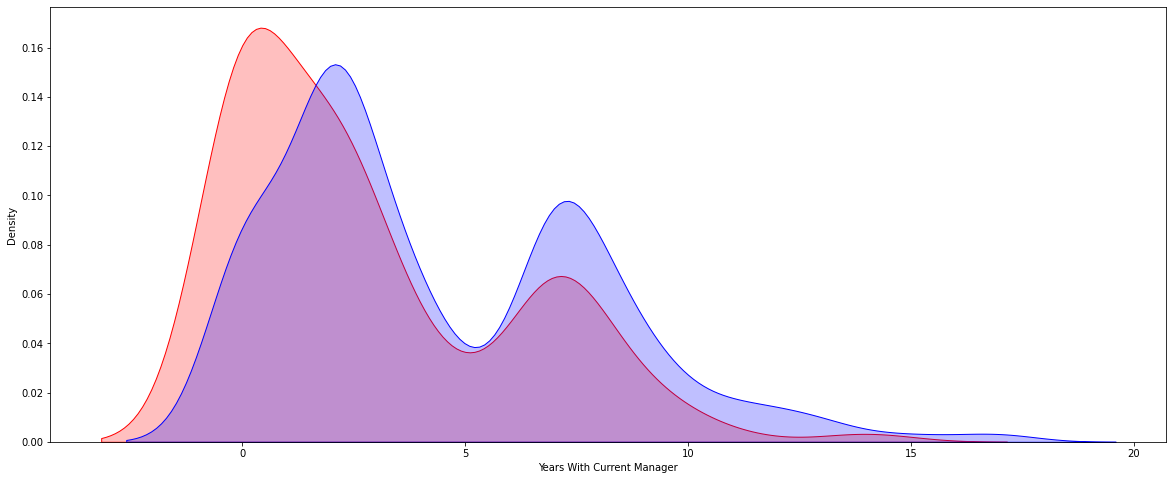

In [119]:
sns.kdeplot(ibm['YearsWithCurrManager'][ibm.Attrition == 'Yes'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(ibm['YearsWithCurrManager'][ibm.Attrition == 'No'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('Years With Current Manager')

**Visualising total working years with respect to Attrition**

---



Text(0.5, 0, 'Total Working Years')

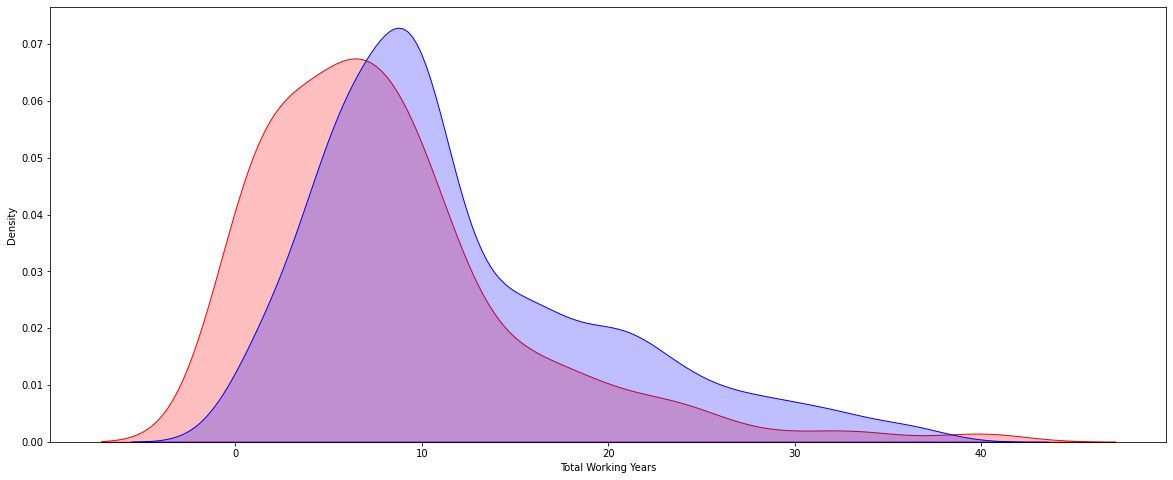

In [121]:
sns.kdeplot(ibm['TotalWorkingYears'][ibm.Attrition == 'Yes'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(ibm['TotalWorkingYears'][ibm.Attrition == 'No'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('Total Working Years')

# Question 1. Break down of DistanceFromHome by JobRole and Attrition

---




In [ ]:
# Lets look at distance from home and attrition levels among various job roles.
ibm.groupby(['JobRole','Attrition']).DistanceFromHome.mean().unstack()

Attrition,No,Yes
JobRole,,
Healthcare Representative,9.204918,17.666667
Human Resources,6.600000,13.416667
Laboratory Technician,9.329949,9.661290
Manager,7.927835,10.000000
Manufacturing Director,9.533333,8.800000
Research Director,8.474359,7.000000
Research Scientist,8.869388,9.765957
Sales Executive,9.026022,12.649123
Sales Representative,9.000000,8.151515


Text(0, 0.5, 'Distance from Home')

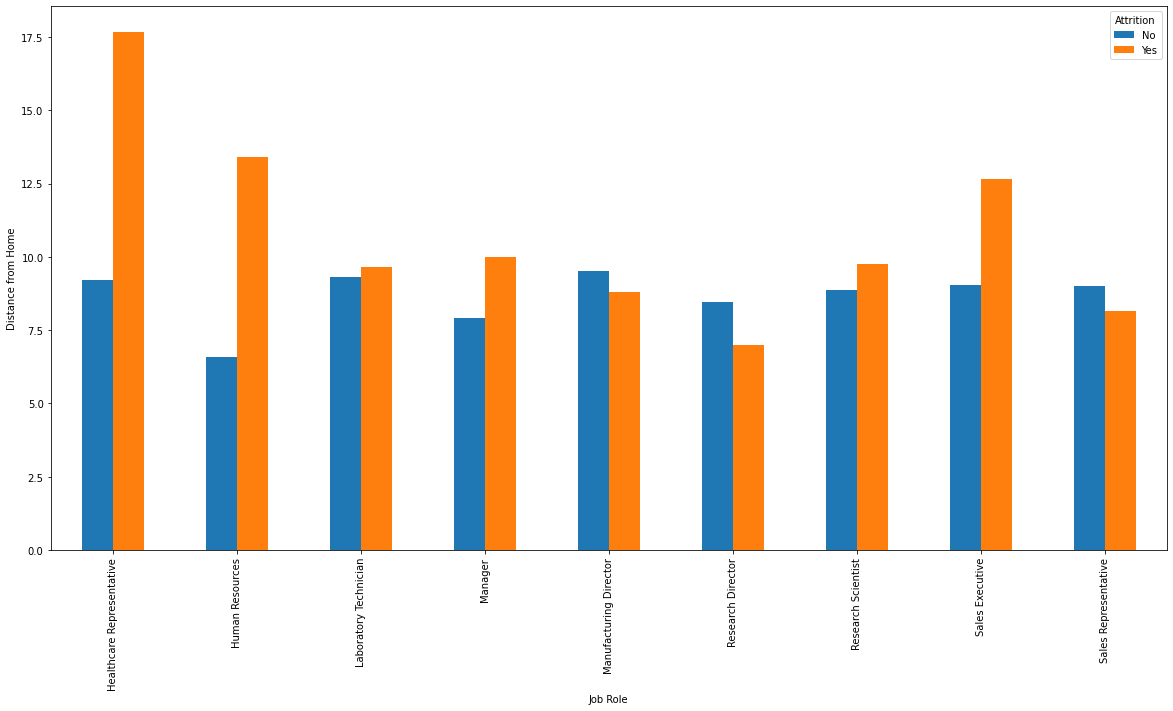

In [ ]:
plt.rcParams['figure.figsize'] = 20, 10

ibm.groupby(['JobRole','Attrition']).DistanceFromHome.mean().unstack().plot(kind='bar')
plt.xlabel('Job Role')
plt.ylabel('Distance from Home')


- Among the employees in various job roles, the mean distance of work from home for HealthCare Representatives, Human Resources Employees, Managers, and Sales Executives employees who left the company is larger than the mean distance of work from home for the employees who did not leave

# Question 2. Comparing the Average Monthly Income by Education and Attrition

---



In [122]:
ibm.groupby(['Education','Attrition']).MonthlyIncome.mean().unstack()

Attrition,No,Yes
Education,,
1,5926.129496,4360.161290
2,6586.058824,4282.545455
3,6882.919662,4770.242424
4,7087.814706,5335.155172
5,8559.906977,5850.200000


Text(0, 0.5, 'Average Monthly Income')

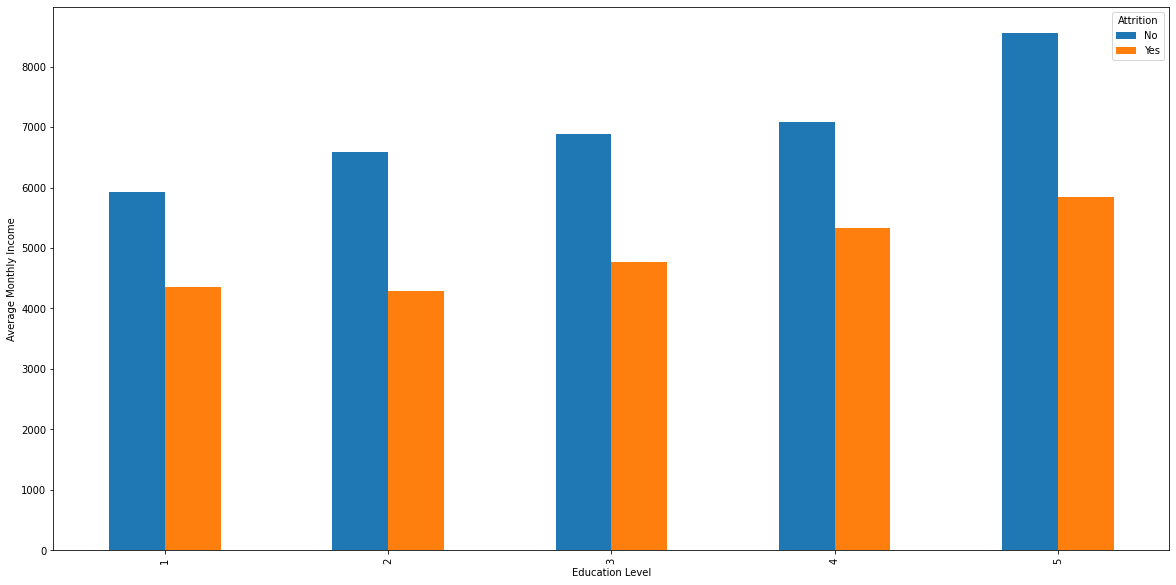

In [124]:
plt.rcParams['figure.figsize'] = 20, 10

ibm.groupby(['Education','Attrition']).MonthlyIncome.mean().unstack().plot(kind='bar')
plt.xlabel('Education Level')
plt.ylabel('Average Monthly Income')

Note: People with higher levels of education get on average a higher monthly income and are less likely to leave their jobs

# Feature Engineering

In [ ]:
data.drop(columns=['Attrition_encoded', 'Overtime_encoded'], inplace=True)

In [ ]:
binary_features = data.nunique()[data.nunique() == 2].keys().tolist()
numeric_features = [col for col in data.select_dtypes(['float','int']).columns.tolist() if col not in binary_features]
categorical_features = [col for col in data.select_dtypes('object').columns.to_list() if col not in binary_features + numeric_features]

In [ ]:
encoded_df = data.copy()